# ダイクストラ法

In [9]:
import copy
from graphviz import Graph

In [20]:
class WeightedGraph:
    def __init__(self, graph_array):
        """
        graph_array : array
            二次元配列。graph_array[i][j] > 0 <=> ノードiとノードjの間にエッジが存在
            graph_array[i][j] の値はノード間の距離に相当
        """
        self.graph = graph_array
        self.size = len(graph_array)
        if self.size != len(graph_array[0]):
            raise Exception('入力配列の縦横サイズが異なります')
    
    def dijkstra(self, i_from, i_to):
        g = copy.deepcopy(self.graph)
        g_shortest = [[None for j in range(len(g))] for i in range(len(g))]
        g_shortest[i_from][i_from] = 0
        while g_shortest[i_from][i_to] is None:
            i_not_fixed = [i for i in range(len(g)) if g_shortest[i_from][i] is None]
            # 一番近いノードまでの距離を確定させる
            i_min = i_not_fixed[0]
            d_min = g[i_from][i_min]
            for i in i_not_fixed:
                if d_min > g[i_from][i]:
                    i_min, d_min = i, g[i_from][i]
            g_shortest[i_from][i_min] = d_min
            # 一番近いノードを経由するルートも含めて各ノードまでの最短距離を求め、値を更新
            for i in i_not_fixed:
                if g[i_from][i_min] + g[i_min][i] < g[i_from][i]:
                    g[i_from][i] = g[i_from][i_min] + g[i_min][i]
        return g_shortest[i_from][i_to]

    def draw(self, infinity):
        dot = Graph()
        dot.attr('node', shape='circle')
        for i in range(self.size):
            dot.node(str(i), str(i))
        for i in range(self.size):
            for j in range(i+1, self.size):
                if 0 < self.graph[i][j] and self.graph[i][j] < infinity:
                    dot.edge(str(i), str(j), label=str(self.graph[i][j]))
        return dot

0->1: 1
0->2: 2
0->3: 3
0->4: 4
1->2: 3
1->3: 4
1->4: 5
2->3: 5
2->4: 5
3->4: 1


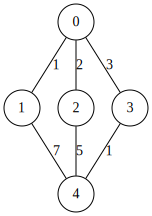

In [24]:
M = 9999
graph_array = [
    [0,1,2,3,M],
    [1,0,M,M,7],
    [2,M,0,M,5],
    [3,M,M,0,1],
    [M,7,5,1,0]
]
graph = WeightedGraph(graph_array)
for i in range(len(graph_array)):
    for j in range(i+1, len(graph_array)):
        print('{}->{}: {}'.format(i, j, graph.dijkstra(i, j)))

graph.draw(M)

0->1: 1
0->2: 2
0->3: 3
0->4: 4
0->5: 4
1->2: 3
1->3: 4
1->4: 5
1->5: 5
2->3: 3
2->4: 4
2->5: 4
3->4: 1
3->5: 3
4->5: 4


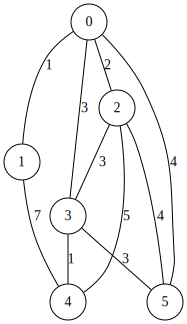

In [27]:
M = 9999
graph_array = [
    [0,1,2,3,M,4],
    [1,0,M,M,7,M],
    [2,M,0,3,5,4],
    [3,M,3,0,1,3],
    [M,7,5,1,0,M],
    [4,M,4,3,M,0]
]
graph = WeightedGraph(graph_array)
for i in range(len(graph_array)):
    for j in range(i+1, len(graph_array)):
        print('{}->{}: {}'.format(i, j, graph.dijkstra(i, j)))

graph.draw(M)